In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, rcParams, font_manager 
#!find / -name "*Nanum*.ttf"
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
fontName = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=fontName)

import seaborn as sns

from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

### 로지스틱 회귀 

In [146]:
df = pd.read_csv('ADP_book_ver01/data/bodyPerformance.csv')
df['gender'] = np.where(df['gender']=='M', 0, 1)   # 더미
df['class_1'] = np.where(df['class']=='A', 0, 1) # 타겟변수

df.tail(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
13390,39.00,0,177.20,80.50,20.10,78.00,132.00,63.50,16.40,45.00,229.00,A,0
13391,64.00,1,146.10,57.70,40.40,68.00,121.00,19.30,9.20,0.00,75.00,D,1
13392,34.00,0,164.00,66.10,19.50,82.00,150.00,35.90,7.10,51.00,180.00,C,1


In [147]:
from sklearn.model_selection import train_test_split 

cols = [ col for col in df.select_dtypes(exclude='object').columns if col not in ['class', 'class_1'] ]

X = df[cols]
y = df['class_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

params = {'penalty' : ['l1', 'l2', 'elasticnet'],
          'C' : [0.1, 1, 10],
          'solver' : ['iiblinear', 'sag', 'saga', 'ibfgs']}
lr_model = GridSearchCV(lr, params)
lr_model.fit(X_train, y_train)

lr_model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'sag'}

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = lr_model.predict(X_test)

print(confusion_matrix(y_test, pred), end='\n\n')
print(classification_report(y_test, pred))

print('정확도 : ', accuracy_score(y_test, pred))
print('정밀도 : ', precision_score(y_test, pred))
print('재현율 : ', recall_score(y_test, pred))
print('f1-Score : ', f1_score(y_test, pred))

[[ 586  454]
 [ 209 2769]]

              precision    recall  f1-score   support

           0       0.74      0.56      0.64      1040
           1       0.86      0.93      0.89      2978

    accuracy                           0.83      4018
   macro avg       0.80      0.75      0.77      4018
weighted avg       0.83      0.83      0.83      4018

정확도 :  0.8349925335988054
정밀도 :  0.8591374495811356
재현율 :  0.929818670248489
f1-Score :  0.8930817610062892


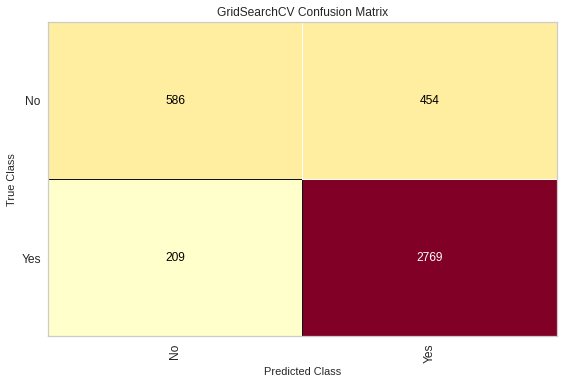

<Figure size 576x396 with 0 Axes>

In [132]:
# https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
from yellowbrick.classifier import confusion_matrix as cm
cm(lr_model, X_train, y_train, X_test, y_test, classes=['No', 'Yes'])
plt.tight_layout()

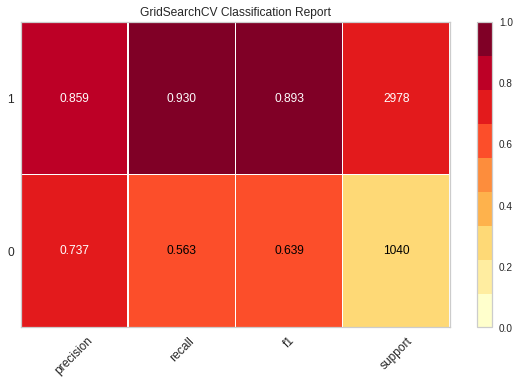

In [134]:
from yellowbrick.classifier import classification_report as cr 

visualizer = cr(lr_model, X_train, y_train, X_test, y_test, classes=[0,1], support=True)

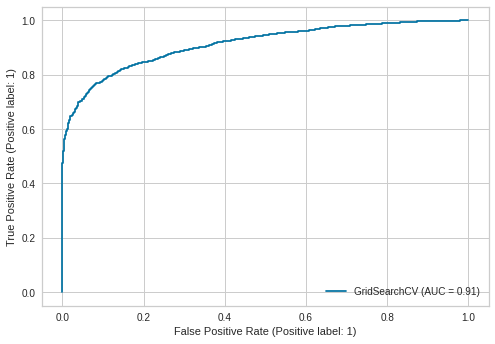

ROC AUC Score :  0.9128571059565015


In [78]:
from sklearn.metrics import plot_roc_curve, roc_auc_score 
plot_roc_curve(lr_model, X_test, y_test)
plt.show()
ra_score = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
print("ROC AUC Score : ", ra_score)

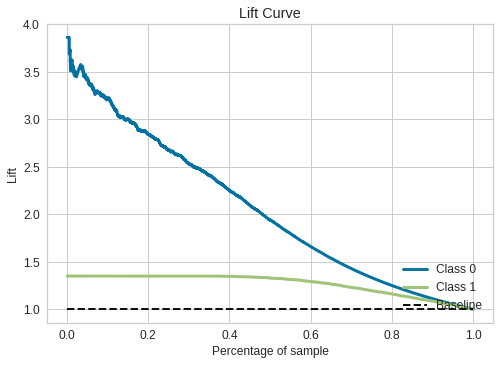

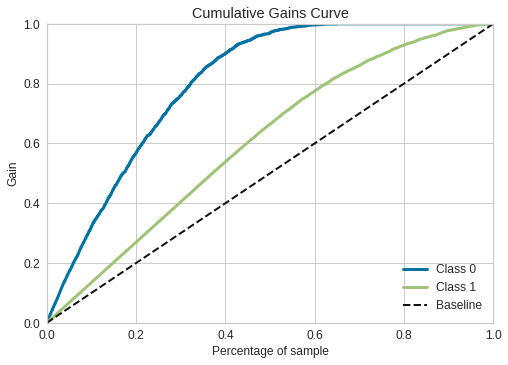

In [150]:
# https://scikit-plot.readthedocs.io/en/stable/metrics.html
import scikitplot as skplt

proba = lr_model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, proba)
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, proba)
plt.show()

#### 사이킷런에서 회귀계수(coef_) 확인을 위해서는 GridSearch 제외하고 돌려야 함

In [39]:
# Statsmodels 활용 : 피처별 p-value 해석
# importing libraries
import statsmodels.api as sm

log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.327742
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                class_1   No. Observations:                 9375
Model:                          Logit   Df Residuals:                     9364
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Nov 2022   Pseudo R-squ.:                  0.4128
Time:                        11:48:16   Log-Likelihood:                -3072.6
converged:                       True   LL-Null:                       -5232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0744      0.004    -20.836      0.000      -0.081   

### 로지스틱회귀 중 변수선택

- ADP R 교재 249쪽

In [ ]:
df <- read.csv('bodyPerformance.csv')
tail(df)
str(df)

# 타겟생성 
df$sex <- ifelse(df$gender=='M',df$sex<-1, df$sex<-0)
df$target <- ifelse(df$class=='A', df$target<-0, df$target<-1)
df$target <- factor(df$target)
table(df$target, df$class)
df <- subset(df, select=-c(gender, class)) 
str(df)

# 데이터분할 
set.seed(123)
idx <- sample(1:nrow(df), nrow(df)*0.7,, replace=FALSE)
train <- df[idx,]
test <- df[-idx,]

# full 모델 
lr <- glm(target ~ ., data=df, family='binomial')
summary(lr)

# 변수선택 
step.lr <- step(glm(target~1, data=df, family='binomial'),
                scope=list(lower=~1, upper=~age + height_cm + weight_kg + body.fat_. + diastolic + systolic + gripForce + 
                             sit.and.bend.forward_cm + sit.ups.counts + broad.jump_cm + sex), 
                direction = 'both')
summary(step.lr)

# 성과확인 
#install.packages("caret")
library(caret)

#pred <- predict(step.lr, test[,-1], type="response")
pred <- predict(step.lr, subset(test, select=-c(target)), type="response")

pred1 <- as.data.frame(pred)
pred1$grade <- ifelse(pred1$pred<0.5, pred1$grade<-0, pred1$grade<-1)
#confusionMatrix(data=as.factor(pred1$grade), reference=test[,1], positive='1')
confusionMatrix(data=as.factor(pred1$grade), reference=test$target, positive='1')

install.package("ROCR")
library(ROCR)
#pred.logistic.roc <- prediction(as.numeric(pred1$grade), as.numeric(test[,1]))
pred.logistic.roc <- prediction(as.numeric(pred1$grade), as.numeric(test$target))
plot(performance(pred.logistic.roc, "tpr", "fpr"))
abline(a=0, b=1, lty=2, col="black")

In [21]:
# 참고 : 교차검증 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=10)
print(np.mean(scores), '\n', scores)

0.8396838797323036 
 [0.85181237 0.8326226  0.8315565  0.82089552 0.82515991 0.84951974
 0.84311633 0.85912487 0.84631804 0.83671291]


### 로지스틱 다항 회귀 

- p197

In [151]:
df = pd.read_csv('ADP_book_ver01/data/bodyPerformance.csv')

df['gender'] = np.where(df['gender']=='M', 0, 1)
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
df['class_2'] = df['class'].map(mapping)
df.tail(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
13390,39.00,0,177.20,80.50,20.10,78.00,132.00,63.50,16.40,45.00,229.00,A,0
13391,64.00,1,146.10,57.70,40.40,68.00,121.00,19.30,9.20,0.00,75.00,D,3
13392,34.00,0,164.00,66.10,19.50,82.00,150.00,35.90,7.10,51.00,180.00,C,2


In [152]:
from sklearn.model_selection import train_test_split 

cols = [ col for col in df.select_dtypes(exclude='object').columns if col not in ['class', 'class_2'] ]
X = df[cols]
y = df['class_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [153]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', random_state=42)

In [155]:
%%time
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ['l1', 'l2', 'elasticnet'],
          'C' : [0.1, 1, 10],
          'solver' : ['lgfgs', 'sag', 'newton_cg', 'ibfgs']}
lr_model = GridSearchCV(lr, params)
lr_model.fit(X_train, y_train)

lr_model.best_params_

CPU times: user 5.17 s, sys: 4 ms, total: 5.18 s
Wall time: 5.18 s


{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}

In [156]:
pred = lr_model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred), end='\n\n')
print(classification_report(y_test, pred))

print('정확도 : ', accuracy_score(y_test, pred))

[[744 234  26   0]
 [271 418 277  38]
 [114 196 504 191]
 [ 27  45 165 768]]

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1004
           1       0.47      0.42      0.44      1004
           2       0.52      0.50      0.51      1005
           3       0.77      0.76      0.77      1005

    accuracy                           0.61      4018
   macro avg       0.60      0.61      0.60      4018
weighted avg       0.60      0.61      0.60      4018

정확도 :  0.6057740169238427


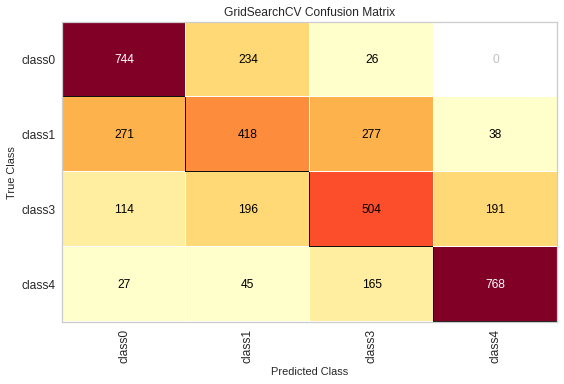

<Figure size 576x396 with 0 Axes>

In [68]:
# https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
from yellowbrick.classifier import confusion_matrix as cm
cm(lr_model, X_train, y_train, X_test, y_test, classes=['class0', 'class1', 'class3', 'class4'])
plt.tight_layout()

### 트리 

- p235

In [158]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('ADP_book_ver01/data/credit_final.csv')

X = df.drop('credit.rating', axis=1)
y = df['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth' : [3,5,10],
          'min_samples_leaf' : [1,3,5]}

dt = DecisionTreeClassifier()

dt_model = GridSearchCV(dt, params)
dt_model.fit(X_train, y_train)

dt_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, pred), end='\n\n')
print(classification_report(y_test, pred))

print('정확도 : ', accuracy_score(y_test, pred))

[[ 30  60]
 [ 16 194]]

              precision    recall  f1-score   support

           0       0.65      0.33      0.44        90
           1       0.76      0.92      0.84       210

    accuracy                           0.75       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.73      0.75      0.72       300

정확도 :  0.7466666666666667


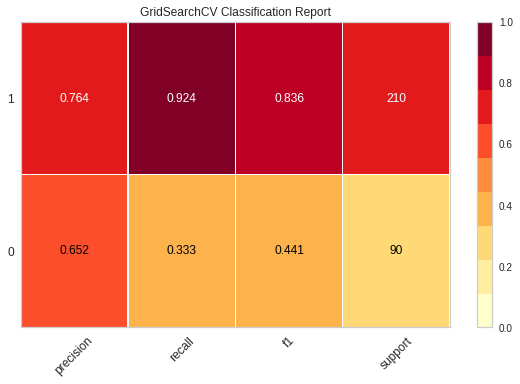

In [127]:
from yellowbrick.classifier import classification_report as cr 

visualizer = cr(dt_model, X_train, y_train, X_test, y_test, classes=[0,1], support=True)

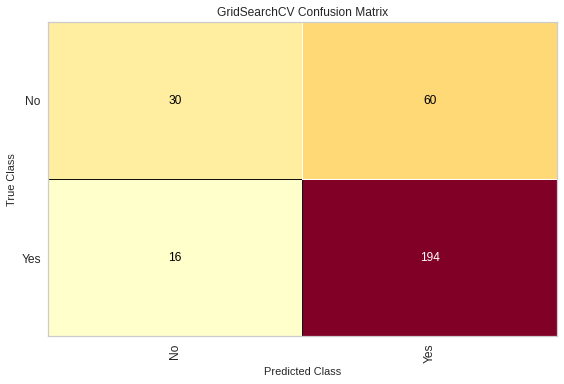

<Figure size 576x396 with 0 Axes>

In [105]:
# https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
from yellowbrick.classifier import confusion_matrix as cm
cm(dt_model, X_train, y_train, X_test, y_test, classes=['No', 'Yes'])
plt.tight_layout()

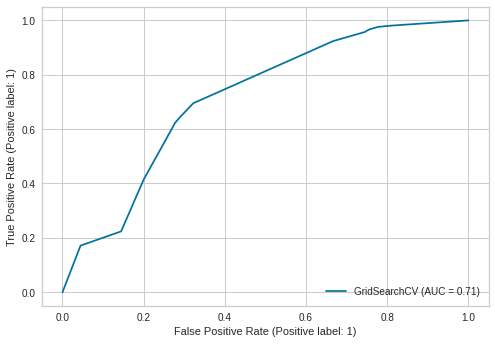

ROC AUC Score :  0.7149735449735449


In [107]:
from sklearn.metrics import plot_roc_curve, roc_auc_score 
plot_roc_curve(dt_model, X_test, y_test)
plt.show()

ra_score = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
print("ROC AUC Score : ", ra_score)

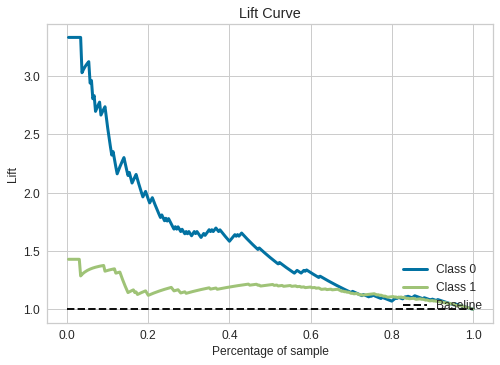

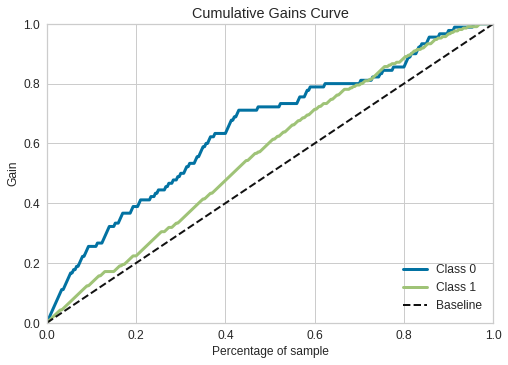

In [161]:
# https://scikit-plot.readthedocs.io/en/stable/metrics.html
import scikitplot as skplt

proba = dt_model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, proba)
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, proba)
plt.show()

##### 변수 중요도 

- GridSearchCV에서는 변수중요도가 지원되지 않음

In [110]:
dt_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}

In [15]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=42)

In [125]:
res = pd.DataFrame({'feat':X.columns, 'imp':clf.feature_importances_}).sort_values(by='imp',  ascending=False)
res.iloc[:2]
#pd.DataFrame({'feat':clf.feature_names_in_, 'imp':clf.feature_importances_}).sort_values(by='imp',  ascending=False).iloc[:5]  (같다)

,feat,imp
0,account.balance,0.36
1,credit.duration.months,0.17


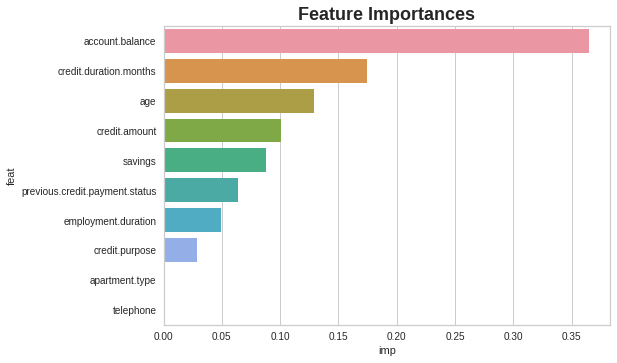

In [135]:
plt.title("Feature Importances", fontweight='bold', fontsize=18)
sns.barplot(x='imp', y='feat', data=res.iloc[:10]);

### 트리 시각화

- https://mljar.com/blog/visualize-decision-tree/
- graphviz 버전 문제 때문에 안되면 빠르게 포기할 것

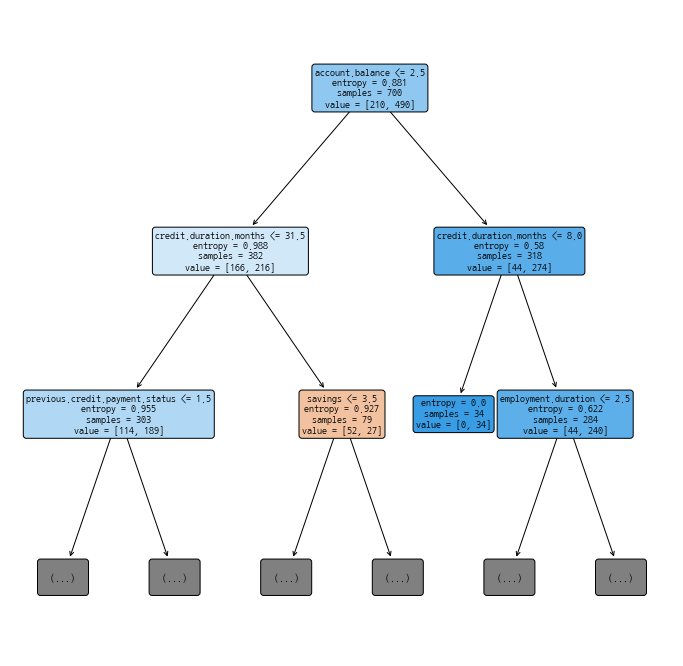

In [47]:
from sklearn import tree 

plt.figure(figsize=(12,12))
tree.plot_tree(clf, max_depth=2, feature_names=X.columns, rounded=True, filled=True, fontsize=10)
plt.show()

In [48]:
# 위 차트와 함께 보기 
from sklearn.tree import export_text 
print(export_text(clf, feature_names=list(X.columns), max_depth=2))

|--- account.balance <= 2.50
|   |--- credit.duration.months <= 31.50
|   |   |--- previous.credit.payment.status <= 1.50
|   |   |   |--- truncated branch of depth 3
|   |   |--- previous.credit.payment.status >  1.50
|   |   |   |--- truncated branch of depth 3
|   |--- credit.duration.months >  31.50
|   |   |--- savings <= 3.50
|   |   |   |--- truncated branch of depth 3
|   |   |--- savings >  3.50
|   |   |   |--- truncated branch of depth 2
|--- account.balance >  2.50
|   |--- credit.duration.months <= 8.00
|   |   |--- class: 1
|   |--- credit.duration.months >  8.00
|   |   |--- employment.duration <= 2.50
|   |   |   |--- truncated branch of depth 3
|   |   |--- employment.duration >  2.50
|   |   |   |--- truncated branch of depth 3



In [62]:
# python ADP 책 : NCP에서는 경로 오류 발생. graphviz 버전 문제 
# !pip install pydotplus
import pydotplus
import pydot 
import graphviz
from sklearn.tree import export_graphviz

clf_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_2.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf_2, out_file=None,
                                feature_names=list(X.columns), 
                                class_names=np.array(['0','1']), 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)

dt_graph = pydotplus.graph_from_dot_data(dot_data)

from IPython.display import Image
# Image(dt_graph.create_png())  -----> 이것도 오류 뜸 ㅠ.ㅜ

In [55]:
# 캐글 뽀개기 책 : NCP에서는 경로 오류 발생. graphviz 버전 문제
from sklearn import tree
import graphviz

clf_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_2.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf_2, out_file=None,
                                feature_names=list(X.columns), 
                                class_names=np.array(['0','1']), 
                                filled=True, 
                                rounded=True, 
                                special_characters=True)

#graph = graphviz.Source(dot_data)  -----> 오류 
#graph

In [ ]:
# !pip install dtreeviz 
from dtreeviz.trees import dtreeviz # graphviz 버전 문제 

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

##### 회귀트리 시각화

In [83]:
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
X = boston.data
y = boston.target

regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- value: [45.58]
|   |   |--- feature_7 >  1.38
|   |   |   |--- value: [22.91]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.99
|   |   |   |--- value: [17.14]
|   |   |--- feature_0 >  6.99
|   |   |   |--- value: [11.98]
|--- feature_5 >  6.94
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [33.35]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [14.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.90]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



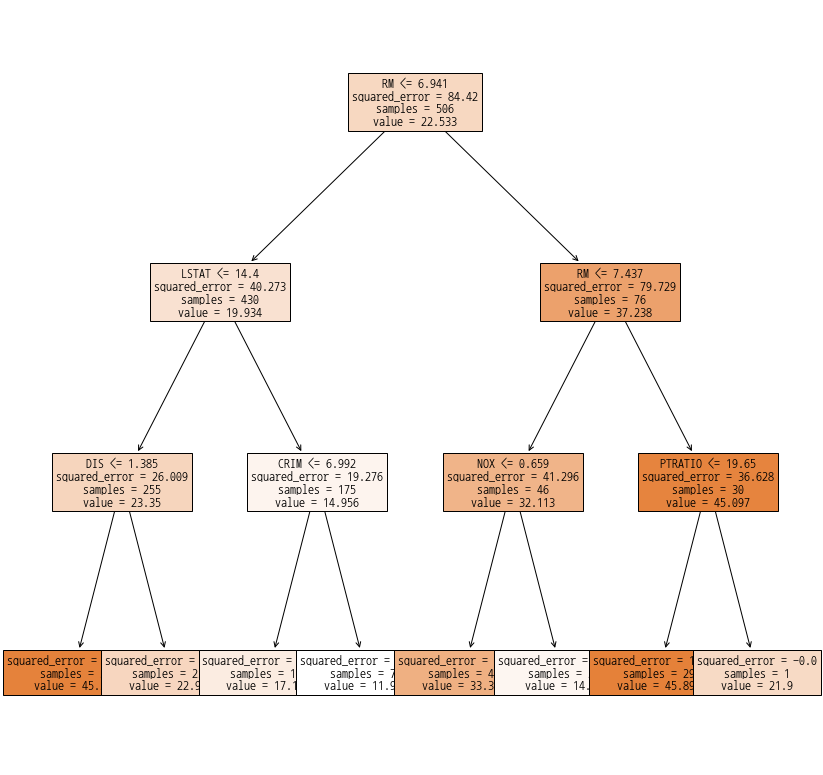

In [88]:
plt.figure(figsize=(14,14))
tree.plot_tree(regr, max_depth=3, feature_names=boston.feature_names, filled=True, fontsize=12);

In [ ]:
# graphviz
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=boston.feature_names,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

# dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(regr, X, y,
                target_name="target",
                feature_names=boston.feature_names)
viz

### 랜덤포레스트

- 그리드서치 
- oob 
- 변수중요도

In [96]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('ADP_book_ver01/data/breast-cancer.csv')

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [121]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50, 100, 1000],
          'criterion':['gini', 'entropy'],
          'max_depth':[3,5,10]}

rf_model = GridSearchCV(RandomForestClassifier(), params)
rf_model.fit(X_train, y_train)  # 다소 시간 걸림 (1분 4초)
print(rf_model.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)
CPU times: user 1min 3s, sys: 588 ms, total: 1min 4s
Wall time: 1min 4s


In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, pred), end='\n\n')
print(classification_report(y_test, pred))

print('정확도 : ', accuracy_score(y_test, pred))

[[107   0]
 [  7  57]]

              precision    recall  f1-score   support

           B       0.94      1.00      0.97       107
           M       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

정확도 :  0.9590643274853801


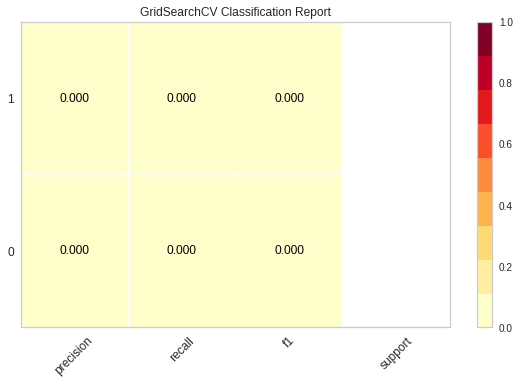

In [123]:
from yellowbrick.classifier import classification_report as cr 

visualizer = cr(rf_model, X_train, y_train, X_test, y_test, classes=[0,1], support=True)  # 결과 이상하게 나옴 ㅠ.ㅜ 

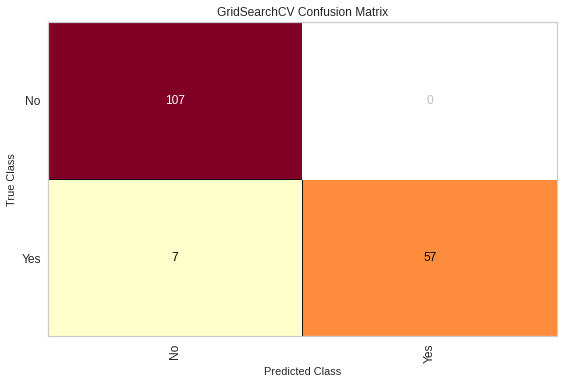

<Figure size 576x396 with 0 Axes>

In [124]:
# https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html
from yellowbrick.classifier import confusion_matrix as cm
cm(rf_model, X_train, y_train, X_test, y_test, classes=['No', 'Yes'])
plt.tight_layout()

Lift & Gain

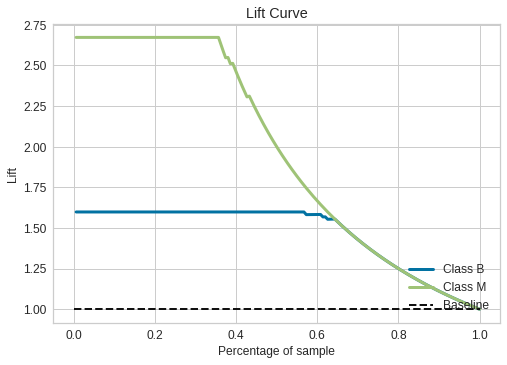

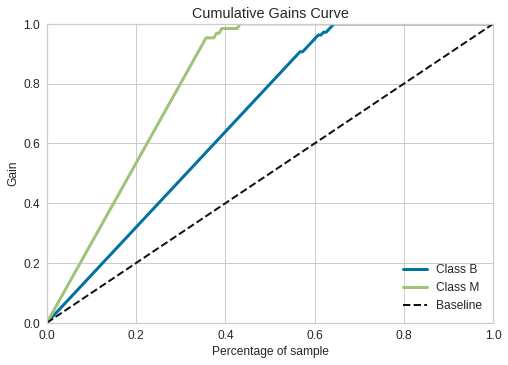

In [145]:
# https://scikit-plot.readthedocs.io/en/stable/metrics.html
import scikitplot as skplt

proba = rf_model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, proba)
plt.show()

skplt.metrics.plot_cumulative_gain(y_test, proba)
plt.show()

변수중요도

In [126]:
clf = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

res = pd.DataFrame({'feat':X.columns, 'imp':clf.feature_importances_}).sort_values(by='imp',  ascending=False)
res.iloc[:2]

,feat,imp
7,concave points_mean,0.12
23,area_worst,0.11


In [138]:
res.tail()

,feat,imp
9,fractal_dimension_mean,0.00
14,smoothness_se,0.00
29,fractal_dimension_worst,0.00
8,symmetry_mean,0.00
17,concave points_se,0.00


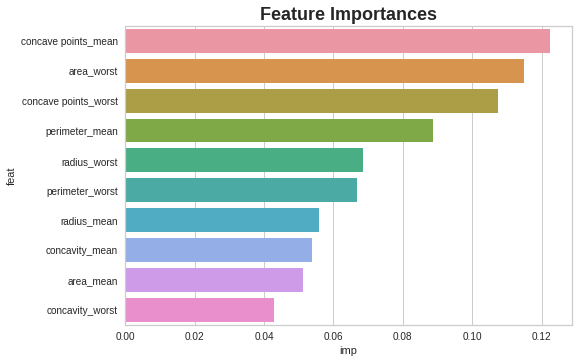

In [127]:
plt.title("Feature Importances", fontweight='bold', fontsize=18)
sns.barplot(x='imp', y='feat', data=res.iloc[:10]);

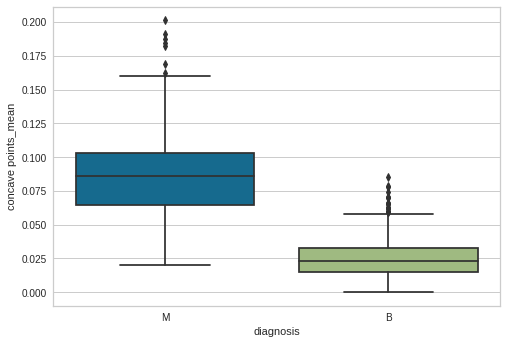

In [140]:
sns.boxplot(x='diagnosis', y='concave points_mean', data=df); # 가장 중요도 낮은 변수

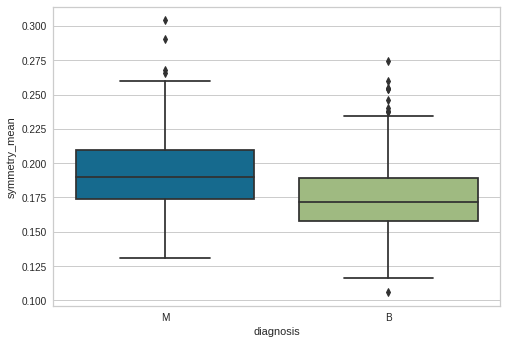

In [141]:
sns.boxplot(x='diagnosis', y='symmetry_mean', data=df);  # 가장 중요한 변수

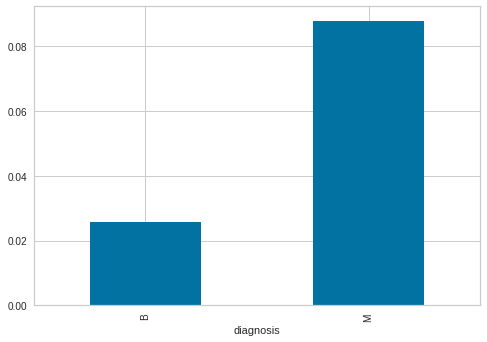

In [142]:
df.groupby('diagnosis')['concave points_mean'].mean().plot(kind='bar');

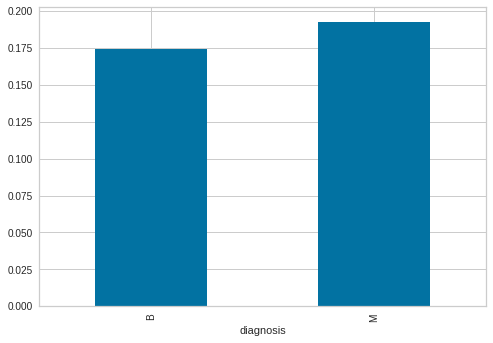

In [143]:
df.groupby('diagnosis')['symmetry_mean'].mean().plot(kind='bar');

### 앙상블 모델 3개 

- 아다부스트, 랜덤포레스트, XGB : roc 비교 

In [179]:
df = pd.read_csv('ADP_book_ver01/data/student_data.csv')
df = df.dropna(how='any')
df = pd.get_dummies(df, drop_first=True)
df['target'] = np.where(df['grade'] >= 10, 1, 0)

X = df.drop(['grade', 'target'], axis=1)
y = df['target']

In [185]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

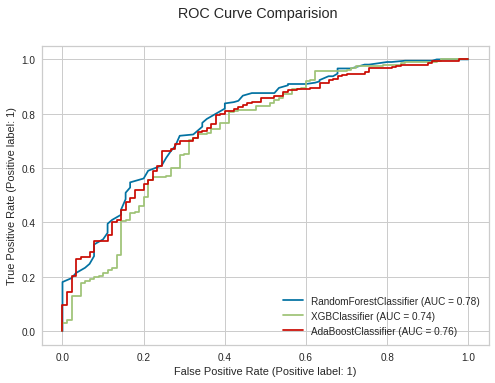

In [196]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_roc = plot_roc_curve(rfc, X_test, y_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_roc = plot_roc_curve(xgb, X_test, y_test, ax=rfc_roc.ax_)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_roc = plot_roc_curve(ada, X_test, y_test, ax=rfc_roc.ax_)

ada_roc.figure_.suptitle("ROC Curve Comparision")

plt.show()

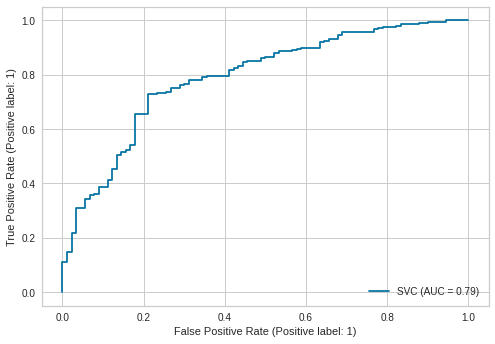

In [197]:
# SVM은 스케일링 필수적 (스케일링 하지 않으면 전혀 fitting 되지 않음)
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaler = mms.fit_transform(X_train)
X_test_scaler = mms.transform(X_test)

svc = SVC()
svc.fit(X_train_scaler, y_train)

plot_roc_curve(svc, X_test_scaler, y_test)

In [203]:
#!pip install lightgbm

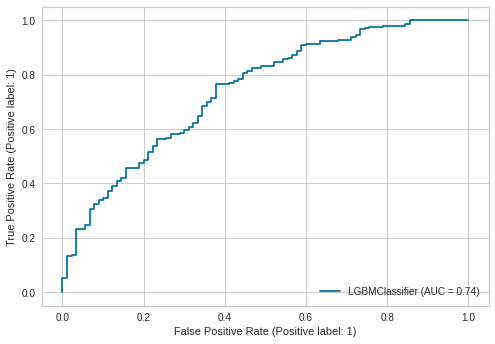

In [204]:
import lightgbm as lgb

lgm = lgb.LGBMClassifier()
lgm.fit(X_train, y_train)
plot_roc_curve(lgm, X_test, y_test)